##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

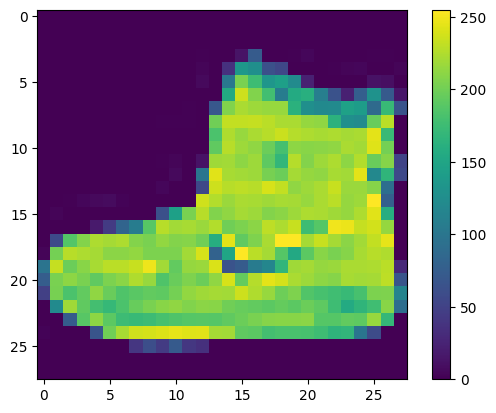

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

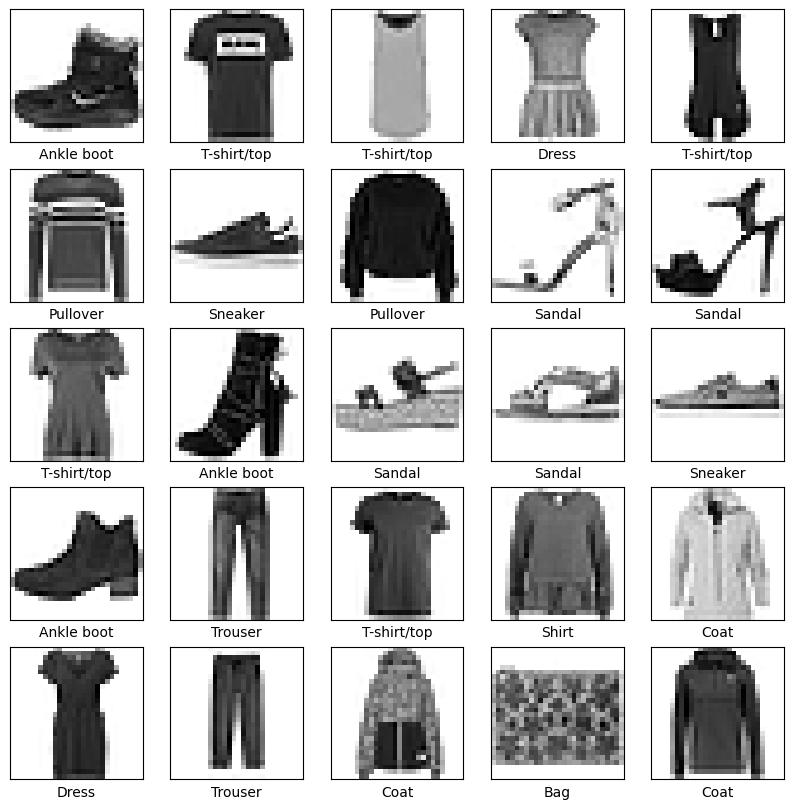

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 45:20 - loss: 2.6769 - accuracy: 0.2188

  27/1875 [..............................] - ETA: 3s - loss: 1.3881 - accuracy: 0.5532   

  55/1875 [..............................] - ETA: 3s - loss: 1.1201 - accuracy: 0.6318

  83/1875 [>.............................] - ETA: 3s - loss: 0.9994 - accuracy: 0.6645

 110/1875 [>.............................] - ETA: 3s - loss: 0.9263 - accuracy: 0.6889

 137/1875 [=>............................] - ETA: 3s - loss: 0.8758 - accuracy: 0.7071

 164/1875 [=>............................] - ETA: 3s - loss: 0.8373 - accuracy: 0.7205

 191/1875 [==>...........................] - ETA: 3s - loss: 0.7994 - accuracy: 0.7331

 218/1875 [==>...........................] - ETA: 3s - loss: 0.7695 - accuracy: 0.7411

 245/1875 [==>...........................] - ETA: 3s - loss: 0.7453 - accuracy: 0.7482

 272/1875 [===>..........................] - ETA: 3s - loss: 0.7225 - accuracy: 0.7552

 299/1875 [===>..........................] - ETA: 2s - loss: 0.7125 - accuracy: 0.7577

 326/1875 [====>.........................] - ETA: 2s - loss: 0.7016 - accuracy: 0.7608

 352/1875 [====>.........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.7635

 378/1875 [=====>........................] - ETA: 2s - loss: 0.6780 - accuracy: 0.7681

 403/1875 [=====>........................] - ETA: 2s - loss: 0.6680 - accuracy: 0.7713

 428/1875 [=====>........................] - ETA: 2s - loss: 0.6594 - accuracy: 0.7744

 453/1875 [======>.......................] - ETA: 2s - loss: 0.6513 - accuracy: 0.7757

 479/1875 [======>.......................] - ETA: 2s - loss: 0.6447 - accuracy: 0.7784

 505/1875 [=======>......................] - ETA: 2s - loss: 0.6386 - accuracy: 0.7804

 532/1875 [=======>......................] - ETA: 2s - loss: 0.6319 - accuracy: 0.7827

 559/1875 [=======>......................] - ETA: 2s - loss: 0.6254 - accuracy: 0.7845

 585/1875 [========>.....................] - ETA: 2s - loss: 0.6197 - accuracy: 0.7863

 612/1875 [========>.....................] - ETA: 2s - loss: 0.6141 - accuracy: 0.7879

 639/1875 [=========>....................] - ETA: 2s - loss: 0.6082 - accuracy: 0.7896

 666/1875 [=========>....................] - ETA: 2s - loss: 0.6034 - accuracy: 0.7919

 693/1875 [==========>...................] - ETA: 2s - loss: 0.5986 - accuracy: 0.7936

 720/1875 [==========>...................] - ETA: 2s - loss: 0.5931 - accuracy: 0.7958

 746/1875 [==========>...................] - ETA: 2s - loss: 0.5913 - accuracy: 0.7966

 773/1875 [===========>..................] - ETA: 2s - loss: 0.5861 - accuracy: 0.7980

 799/1875 [===========>..................] - ETA: 2s - loss: 0.5810 - accuracy: 0.7992

 826/1875 [============>.................] - ETA: 2s - loss: 0.5768 - accuracy: 0.8005

 853/1875 [============>.................] - ETA: 1s - loss: 0.5719 - accuracy: 0.8024

 880/1875 [=============>................] - ETA: 1s - loss: 0.5666 - accuracy: 0.8040

 907/1875 [=============>................] - ETA: 1s - loss: 0.5633 - accuracy: 0.8047

 934/1875 [=============>................] - ETA: 1s - loss: 0.5590 - accuracy: 0.8061

 961/1875 [==============>...............] - ETA: 1s - loss: 0.5568 - accuracy: 0.8068

 987/1875 [==============>...............] - ETA: 1s - loss: 0.5551 - accuracy: 0.8078

1014/1875 [===============>..............] - ETA: 1s - loss: 0.5523 - accuracy: 0.8089

1039/1875 [===============>..............] - ETA: 1s - loss: 0.5498 - accuracy: 0.8097

1064/1875 [================>.............] - ETA: 1s - loss: 0.5477 - accuracy: 0.8105

1088/1875 [================>.............] - ETA: 1s - loss: 0.5455 - accuracy: 0.8112

1112/1875 [================>.............] - ETA: 1s - loss: 0.5426 - accuracy: 0.8122

1136/1875 [=================>............] - ETA: 1s - loss: 0.5407 - accuracy: 0.8133

1161/1875 [=================>............] - ETA: 1s - loss: 0.5385 - accuracy: 0.8141

1186/1875 [=================>............] - ETA: 1s - loss: 0.5366 - accuracy: 0.8150

1211/1875 [==================>...........] - ETA: 1s - loss: 0.5335 - accuracy: 0.8158

1236/1875 [==================>...........] - ETA: 1s - loss: 0.5304 - accuracy: 0.8168

1261/1875 [===================>..........] - ETA: 1s - loss: 0.5290 - accuracy: 0.8171

1286/1875 [===================>..........] - ETA: 1s - loss: 0.5263 - accuracy: 0.8178

1311/1875 [===================>..........] - ETA: 1s - loss: 0.5241 - accuracy: 0.8184

1337/1875 [====================>.........] - ETA: 1s - loss: 0.5224 - accuracy: 0.8190

1363/1875 [====================>.........] - ETA: 0s - loss: 0.5200 - accuracy: 0.8199

1389/1875 [=====================>........] - ETA: 0s - loss: 0.5180 - accuracy: 0.8207

1414/1875 [=====================>........] - ETA: 0s - loss: 0.5161 - accuracy: 0.8210

1440/1875 [======================>.......] - ETA: 0s - loss: 0.5151 - accuracy: 0.8214

1466/1875 [======================>.......] - ETA: 0s - loss: 0.5143 - accuracy: 0.8215

1493/1875 [======================>.......] - ETA: 0s - loss: 0.5137 - accuracy: 0.8219

1519/1875 [=======================>......] - ETA: 0s - loss: 0.5124 - accuracy: 0.8224

1545/1875 [=======================>......] - ETA: 0s - loss: 0.5114 - accuracy: 0.8226

1571/1875 [========================>.....] - ETA: 0s - loss: 0.5103 - accuracy: 0.8229

1597/1875 [========================>.....] - ETA: 0s - loss: 0.5090 - accuracy: 0.8231

1623/1875 [========================>.....] - ETA: 0s - loss: 0.5077 - accuracy: 0.8234

1649/1875 [=========================>....] - ETA: 0s - loss: 0.5064 - accuracy: 0.8239

1675/1875 [=========================>....] - ETA: 0s - loss: 0.5048 - accuracy: 0.8242

1700/1875 [==========================>...] - ETA: 0s - loss: 0.5042 - accuracy: 0.8243

1725/1875 [==========================>...] - ETA: 0s - loss: 0.5029 - accuracy: 0.8246

1750/1875 [===========================>..] - ETA: 0s - loss: 0.5016 - accuracy: 0.8248

1775/1875 [===========================>..] - ETA: 0s - loss: 0.5002 - accuracy: 0.8252

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4992 - accuracy: 0.8255

1825/1875 [============================>.] - ETA: 0s - loss: 0.4989 - accuracy: 0.8255

1850/1875 [============================>.] - ETA: 0s - loss: 0.4986 - accuracy: 0.8256

1875/1875 [==============================] - ETA: 0s - loss: 0.4978 - accuracy: 0.8259

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4978 - accuracy: 0.8259


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3869 - accuracy: 0.8125

  26/1875 [..............................] - ETA: 3s - loss: 0.3740 - accuracy: 0.8690

  52/1875 [..............................] - ETA: 3s - loss: 0.3900 - accuracy: 0.8564

  77/1875 [>.............................] - ETA: 3s - loss: 0.4072 - accuracy: 0.8490

 102/1875 [>.............................] - ETA: 3s - loss: 0.4024 - accuracy: 0.8529

 128/1875 [=>............................] - ETA: 3s - loss: 0.3933 - accuracy: 0.8589

 153/1875 [=>............................] - ETA: 3s - loss: 0.3936 - accuracy: 0.8591

 177/1875 [=>............................] - ETA: 3s - loss: 0.3938 - accuracy: 0.8595

 202/1875 [==>...........................] - ETA: 3s - loss: 0.3929 - accuracy: 0.8578

 227/1875 [==>...........................] - ETA: 3s - loss: 0.3935 - accuracy: 0.8572

 252/1875 [===>..........................] - ETA: 3s - loss: 0.3974 - accuracy: 0.8565

 277/1875 [===>..........................] - ETA: 3s - loss: 0.3988 - accuracy: 0.8559

 302/1875 [===>..........................] - ETA: 3s - loss: 0.3977 - accuracy: 0.8564

 326/1875 [====>.........................] - ETA: 3s - loss: 0.3986 - accuracy: 0.8567

 351/1875 [====>.........................] - ETA: 3s - loss: 0.3987 - accuracy: 0.8567

 376/1875 [=====>........................] - ETA: 3s - loss: 0.4007 - accuracy: 0.8565

 401/1875 [=====>........................] - ETA: 2s - loss: 0.3984 - accuracy: 0.8572

 426/1875 [=====>........................] - ETA: 2s - loss: 0.3990 - accuracy: 0.8561

 451/1875 [======>.......................] - ETA: 2s - loss: 0.3978 - accuracy: 0.8568

 476/1875 [======>.......................] - ETA: 2s - loss: 0.3966 - accuracy: 0.8579

 501/1875 [=======>......................] - ETA: 2s - loss: 0.3969 - accuracy: 0.8580

 526/1875 [=======>......................] - ETA: 2s - loss: 0.3949 - accuracy: 0.8585

 551/1875 [=======>......................] - ETA: 2s - loss: 0.3944 - accuracy: 0.8586

 577/1875 [========>.....................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8591

 603/1875 [========>.....................] - ETA: 2s - loss: 0.3930 - accuracy: 0.8597

 630/1875 [=========>....................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8595

 657/1875 [=========>....................] - ETA: 2s - loss: 0.3917 - accuracy: 0.8599

 684/1875 [=========>....................] - ETA: 2s - loss: 0.3919 - accuracy: 0.8604

 711/1875 [==========>...................] - ETA: 2s - loss: 0.3918 - accuracy: 0.8600

 739/1875 [==========>...................] - ETA: 2s - loss: 0.3898 - accuracy: 0.8607

 766/1875 [===========>..................] - ETA: 2s - loss: 0.3885 - accuracy: 0.8612

 793/1875 [===========>..................] - ETA: 2s - loss: 0.3889 - accuracy: 0.8610

 820/1875 [============>.................] - ETA: 2s - loss: 0.3873 - accuracy: 0.8610

 848/1875 [============>.................] - ETA: 2s - loss: 0.3879 - accuracy: 0.8608

 876/1875 [=============>................] - ETA: 1s - loss: 0.3879 - accuracy: 0.8609

 904/1875 [=============>................] - ETA: 1s - loss: 0.3874 - accuracy: 0.8611

 932/1875 [=============>................] - ETA: 1s - loss: 0.3878 - accuracy: 0.8611

 959/1875 [==============>...............] - ETA: 1s - loss: 0.3877 - accuracy: 0.8613

 986/1875 [==============>...............] - ETA: 1s - loss: 0.3868 - accuracy: 0.8615

1014/1875 [===============>..............] - ETA: 1s - loss: 0.3857 - accuracy: 0.8618

1041/1875 [===============>..............] - ETA: 1s - loss: 0.3853 - accuracy: 0.8619

1068/1875 [================>.............] - ETA: 1s - loss: 0.3847 - accuracy: 0.8618

1095/1875 [================>.............] - ETA: 1s - loss: 0.3842 - accuracy: 0.8618

1122/1875 [================>.............] - ETA: 1s - loss: 0.3840 - accuracy: 0.8619

1150/1875 [=================>............] - ETA: 1s - loss: 0.3849 - accuracy: 0.8615

1178/1875 [=================>............] - ETA: 1s - loss: 0.3850 - accuracy: 0.8612

1205/1875 [==================>...........] - ETA: 1s - loss: 0.3858 - accuracy: 0.8613

1232/1875 [==================>...........] - ETA: 1s - loss: 0.3855 - accuracy: 0.8610

1260/1875 [===================>..........] - ETA: 1s - loss: 0.3849 - accuracy: 0.8611

1287/1875 [===================>..........] - ETA: 1s - loss: 0.3851 - accuracy: 0.8607

1315/1875 [====================>.........] - ETA: 1s - loss: 0.3850 - accuracy: 0.8611

1342/1875 [====================>.........] - ETA: 1s - loss: 0.3846 - accuracy: 0.8611

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3840 - accuracy: 0.8615

1397/1875 [=====================>........] - ETA: 0s - loss: 0.3832 - accuracy: 0.8618

1424/1875 [=====================>........] - ETA: 0s - loss: 0.3835 - accuracy: 0.8618

1452/1875 [======================>.......] - ETA: 0s - loss: 0.3828 - accuracy: 0.8619

1480/1875 [======================>.......] - ETA: 0s - loss: 0.3818 - accuracy: 0.8622

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3814 - accuracy: 0.8623

1534/1875 [=======================>......] - ETA: 0s - loss: 0.3806 - accuracy: 0.8626

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3809 - accuracy: 0.8625

1588/1875 [========================>.....] - ETA: 0s - loss: 0.3801 - accuracy: 0.8627

1616/1875 [========================>.....] - ETA: 0s - loss: 0.3803 - accuracy: 0.8626

1644/1875 [=========================>....] - ETA: 0s - loss: 0.3790 - accuracy: 0.8631

1671/1875 [=========================>....] - ETA: 0s - loss: 0.3785 - accuracy: 0.8633

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3782 - accuracy: 0.8633

1726/1875 [==========================>...] - ETA: 0s - loss: 0.3781 - accuracy: 0.8633

1754/1875 [===========================>..] - ETA: 0s - loss: 0.3772 - accuracy: 0.8637

1781/1875 [===========================>..] - ETA: 0s - loss: 0.3777 - accuracy: 0.8634

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3772 - accuracy: 0.8636

1835/1875 [============================>.] - ETA: 0s - loss: 0.3771 - accuracy: 0.8637

1863/1875 [============================>.] - ETA: 0s - loss: 0.3765 - accuracy: 0.8641

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8640


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2441 - accuracy: 0.9375

  29/1875 [..............................] - ETA: 3s - loss: 0.3656 - accuracy: 0.8664

  57/1875 [..............................] - ETA: 3s - loss: 0.3720 - accuracy: 0.8728

  84/1875 [>.............................] - ETA: 3s - loss: 0.3603 - accuracy: 0.8724

 112/1875 [>.............................] - ETA: 3s - loss: 0.3513 - accuracy: 0.8750

 140/1875 [=>............................] - ETA: 3s - loss: 0.3454 - accuracy: 0.8763

 168/1875 [=>............................] - ETA: 3s - loss: 0.3496 - accuracy: 0.8726

 196/1875 [==>...........................] - ETA: 3s - loss: 0.3486 - accuracy: 0.8721

 223/1875 [==>...........................] - ETA: 3s - loss: 0.3448 - accuracy: 0.8733

 250/1875 [===>..........................] - ETA: 3s - loss: 0.3373 - accuracy: 0.8763

 277/1875 [===>..........................] - ETA: 2s - loss: 0.3374 - accuracy: 0.8759

 305/1875 [===>..........................] - ETA: 2s - loss: 0.3356 - accuracy: 0.8751

 333/1875 [====>.........................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8742

 361/1875 [====>.........................] - ETA: 2s - loss: 0.3366 - accuracy: 0.8752

 389/1875 [=====>........................] - ETA: 2s - loss: 0.3373 - accuracy: 0.8746

 417/1875 [=====>........................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8745

 445/1875 [======>.......................] - ETA: 2s - loss: 0.3393 - accuracy: 0.8744

 473/1875 [======>.......................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8745

 501/1875 [=======>......................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8751

 529/1875 [=======>......................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8755

 557/1875 [=======>......................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8752

 585/1875 [========>.....................] - ETA: 2s - loss: 0.3401 - accuracy: 0.8747

 613/1875 [========>.....................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8744

 640/1875 [=========>....................] - ETA: 2s - loss: 0.3422 - accuracy: 0.8740

 668/1875 [=========>....................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8739

 696/1875 [==========>...................] - ETA: 2s - loss: 0.3436 - accuracy: 0.8740

 723/1875 [==========>...................] - ETA: 2s - loss: 0.3426 - accuracy: 0.8746

 750/1875 [===========>..................] - ETA: 2s - loss: 0.3425 - accuracy: 0.8745

 777/1875 [===========>..................] - ETA: 2s - loss: 0.3409 - accuracy: 0.8746

 805/1875 [===========>..................] - ETA: 1s - loss: 0.3407 - accuracy: 0.8746

 832/1875 [============>.................] - ETA: 1s - loss: 0.3405 - accuracy: 0.8752

 859/1875 [============>.................] - ETA: 1s - loss: 0.3402 - accuracy: 0.8752

 886/1875 [=============>................] - ETA: 1s - loss: 0.3399 - accuracy: 0.8755

 913/1875 [=============>................] - ETA: 1s - loss: 0.3386 - accuracy: 0.8758

 941/1875 [==============>...............] - ETA: 1s - loss: 0.3377 - accuracy: 0.8763

 969/1875 [==============>...............] - ETA: 1s - loss: 0.3387 - accuracy: 0.8758

 996/1875 [==============>...............] - ETA: 1s - loss: 0.3384 - accuracy: 0.8762

1024/1875 [===============>..............] - ETA: 1s - loss: 0.3371 - accuracy: 0.8767

1052/1875 [===============>..............] - ETA: 1s - loss: 0.3378 - accuracy: 0.8764

1079/1875 [================>.............] - ETA: 1s - loss: 0.3384 - accuracy: 0.8764

1107/1875 [================>.............] - ETA: 1s - loss: 0.3381 - accuracy: 0.8767

1134/1875 [=================>............] - ETA: 1s - loss: 0.3386 - accuracy: 0.8762

1161/1875 [=================>............] - ETA: 1s - loss: 0.3374 - accuracy: 0.8766

1189/1875 [==================>...........] - ETA: 1s - loss: 0.3368 - accuracy: 0.8767

1217/1875 [==================>...........] - ETA: 1s - loss: 0.3365 - accuracy: 0.8768

1245/1875 [==================>...........] - ETA: 1s - loss: 0.3367 - accuracy: 0.8766

1273/1875 [===================>..........] - ETA: 1s - loss: 0.3369 - accuracy: 0.8765

1301/1875 [===================>..........] - ETA: 1s - loss: 0.3369 - accuracy: 0.8765

1328/1875 [====================>.........] - ETA: 1s - loss: 0.3377 - accuracy: 0.8763

1355/1875 [====================>.........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8765

1383/1875 [=====================>........] - ETA: 0s - loss: 0.3363 - accuracy: 0.8770

1411/1875 [=====================>........] - ETA: 0s - loss: 0.3364 - accuracy: 0.8771

1439/1875 [======================>.......] - ETA: 0s - loss: 0.3368 - accuracy: 0.8768

1467/1875 [======================>.......] - ETA: 0s - loss: 0.3378 - accuracy: 0.8765

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3371 - accuracy: 0.8768

1523/1875 [=======================>......] - ETA: 0s - loss: 0.3373 - accuracy: 0.8767

1550/1875 [=======================>......] - ETA: 0s - loss: 0.3382 - accuracy: 0.8764

1577/1875 [========================>.....] - ETA: 0s - loss: 0.3378 - accuracy: 0.8764

1605/1875 [========================>.....] - ETA: 0s - loss: 0.3379 - accuracy: 0.8764

1633/1875 [=========================>....] - ETA: 0s - loss: 0.3381 - accuracy: 0.8763

1661/1875 [=========================>....] - ETA: 0s - loss: 0.3383 - accuracy: 0.8763

1689/1875 [==========================>...] - ETA: 0s - loss: 0.3383 - accuracy: 0.8764

1716/1875 [==========================>...] - ETA: 0s - loss: 0.3378 - accuracy: 0.8765

1744/1875 [==========================>...] - ETA: 0s - loss: 0.3385 - accuracy: 0.8762

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3376 - accuracy: 0.8766

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3370 - accuracy: 0.8769

1828/1875 [============================>.] - ETA: 0s - loss: 0.3365 - accuracy: 0.8772

1855/1875 [============================>.] - ETA: 0s - loss: 0.3363 - accuracy: 0.8773

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8769


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2715 - accuracy: 0.9375

  29/1875 [..............................] - ETA: 3s - loss: 0.3127 - accuracy: 0.8836

  57/1875 [..............................] - ETA: 3s - loss: 0.3274 - accuracy: 0.8832

  85/1875 [>.............................] - ETA: 3s - loss: 0.3383 - accuracy: 0.8776

 113/1875 [>.............................] - ETA: 3s - loss: 0.3322 - accuracy: 0.8803

 140/1875 [=>............................] - ETA: 3s - loss: 0.3275 - accuracy: 0.8817

 167/1875 [=>............................] - ETA: 3s - loss: 0.3193 - accuracy: 0.8838

 194/1875 [==>...........................] - ETA: 3s - loss: 0.3178 - accuracy: 0.8848

 221/1875 [==>...........................] - ETA: 3s - loss: 0.3191 - accuracy: 0.8857

 248/1875 [==>...........................] - ETA: 3s - loss: 0.3206 - accuracy: 0.8837

 275/1875 [===>..........................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8836

 302/1875 [===>..........................] - ETA: 2s - loss: 0.3188 - accuracy: 0.8839

 330/1875 [====>.........................] - ETA: 2s - loss: 0.3190 - accuracy: 0.8839

 357/1875 [====>.........................] - ETA: 2s - loss: 0.3189 - accuracy: 0.8844

 385/1875 [=====>........................] - ETA: 2s - loss: 0.3163 - accuracy: 0.8847

 413/1875 [=====>........................] - ETA: 2s - loss: 0.3174 - accuracy: 0.8849

 440/1875 [======>.......................] - ETA: 2s - loss: 0.3168 - accuracy: 0.8844

 468/1875 [======>.......................] - ETA: 2s - loss: 0.3187 - accuracy: 0.8835

 495/1875 [======>.......................] - ETA: 2s - loss: 0.3183 - accuracy: 0.8841

 522/1875 [=======>......................] - ETA: 2s - loss: 0.3189 - accuracy: 0.8837

 549/1875 [=======>......................] - ETA: 2s - loss: 0.3188 - accuracy: 0.8841

 577/1875 [========>.....................] - ETA: 2s - loss: 0.3195 - accuracy: 0.8837

 605/1875 [========>.....................] - ETA: 2s - loss: 0.3201 - accuracy: 0.8831

 633/1875 [=========>....................] - ETA: 2s - loss: 0.3205 - accuracy: 0.8827

 660/1875 [=========>....................] - ETA: 2s - loss: 0.3213 - accuracy: 0.8829

 688/1875 [==========>...................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8832

 716/1875 [==========>...................] - ETA: 2s - loss: 0.3193 - accuracy: 0.8830

 743/1875 [==========>...................] - ETA: 2s - loss: 0.3188 - accuracy: 0.8832

 770/1875 [===========>..................] - ETA: 2s - loss: 0.3189 - accuracy: 0.8830

 797/1875 [===========>..................] - ETA: 1s - loss: 0.3186 - accuracy: 0.8828

 825/1875 [============>.................] - ETA: 1s - loss: 0.3192 - accuracy: 0.8823

 852/1875 [============>.................] - ETA: 1s - loss: 0.3203 - accuracy: 0.8822

 879/1875 [=============>................] - ETA: 1s - loss: 0.3199 - accuracy: 0.8820

 906/1875 [=============>................] - ETA: 1s - loss: 0.3186 - accuracy: 0.8825

 934/1875 [=============>................] - ETA: 1s - loss: 0.3196 - accuracy: 0.8825

 962/1875 [==============>...............] - ETA: 1s - loss: 0.3199 - accuracy: 0.8825

 989/1875 [==============>...............] - ETA: 1s - loss: 0.3197 - accuracy: 0.8829

1016/1875 [===============>..............] - ETA: 1s - loss: 0.3194 - accuracy: 0.8830

1043/1875 [===============>..............] - ETA: 1s - loss: 0.3196 - accuracy: 0.8826

1071/1875 [================>.............] - ETA: 1s - loss: 0.3202 - accuracy: 0.8824

1098/1875 [================>.............] - ETA: 1s - loss: 0.3205 - accuracy: 0.8823

1125/1875 [=================>............] - ETA: 1s - loss: 0.3208 - accuracy: 0.8823

1153/1875 [=================>............] - ETA: 1s - loss: 0.3202 - accuracy: 0.8823

1180/1875 [=================>............] - ETA: 1s - loss: 0.3195 - accuracy: 0.8826

1206/1875 [==================>...........] - ETA: 1s - loss: 0.3190 - accuracy: 0.8827

1233/1875 [==================>...........] - ETA: 1s - loss: 0.3194 - accuracy: 0.8827

1260/1875 [===================>..........] - ETA: 1s - loss: 0.3190 - accuracy: 0.8830

1287/1875 [===================>..........] - ETA: 1s - loss: 0.3185 - accuracy: 0.8830

1314/1875 [====================>.........] - ETA: 1s - loss: 0.3187 - accuracy: 0.8828

1341/1875 [====================>.........] - ETA: 0s - loss: 0.3185 - accuracy: 0.8826

1368/1875 [====================>.........] - ETA: 0s - loss: 0.3184 - accuracy: 0.8826

1395/1875 [=====================>........] - ETA: 0s - loss: 0.3183 - accuracy: 0.8825

1422/1875 [=====================>........] - ETA: 0s - loss: 0.3178 - accuracy: 0.8828

1450/1875 [======================>.......] - ETA: 0s - loss: 0.3169 - accuracy: 0.8832

1477/1875 [======================>.......] - ETA: 0s - loss: 0.3159 - accuracy: 0.8837

1504/1875 [=======================>......] - ETA: 0s - loss: 0.3153 - accuracy: 0.8840

1531/1875 [=======================>......] - ETA: 0s - loss: 0.3147 - accuracy: 0.8841

1558/1875 [=======================>......] - ETA: 0s - loss: 0.3150 - accuracy: 0.8841

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3149 - accuracy: 0.8840

1612/1875 [========================>.....] - ETA: 0s - loss: 0.3151 - accuracy: 0.8838

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3152 - accuracy: 0.8839

1665/1875 [=========================>....] - ETA: 0s - loss: 0.3148 - accuracy: 0.8840

1692/1875 [==========================>...] - ETA: 0s - loss: 0.3142 - accuracy: 0.8844

1719/1875 [==========================>...] - ETA: 0s - loss: 0.3139 - accuracy: 0.8845

1746/1875 [==========================>...] - ETA: 0s - loss: 0.3144 - accuracy: 0.8845

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3139 - accuracy: 0.8847

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3141 - accuracy: 0.8845

1827/1875 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.8844

1854/1875 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8845

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - accuracy: 0.8847


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2311 - accuracy: 0.8750

  29/1875 [..............................] - ETA: 3s - loss: 0.2885 - accuracy: 0.8966

  57/1875 [..............................] - ETA: 3s - loss: 0.2914 - accuracy: 0.8986

  85/1875 [>.............................] - ETA: 3s - loss: 0.2836 - accuracy: 0.9055

 113/1875 [>.............................] - ETA: 3s - loss: 0.2913 - accuracy: 0.9021

 140/1875 [=>............................] - ETA: 3s - loss: 0.2934 - accuracy: 0.9002

 167/1875 [=>............................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8978

 194/1875 [==>...........................] - ETA: 3s - loss: 0.2953 - accuracy: 0.8971

 221/1875 [==>...........................] - ETA: 3s - loss: 0.2918 - accuracy: 0.8973

 248/1875 [==>...........................] - ETA: 3s - loss: 0.2913 - accuracy: 0.8971

 275/1875 [===>..........................] - ETA: 2s - loss: 0.2887 - accuracy: 0.8974

 302/1875 [===>..........................] - ETA: 2s - loss: 0.2896 - accuracy: 0.8975

 330/1875 [====>.........................] - ETA: 2s - loss: 0.2912 - accuracy: 0.8968

 358/1875 [====>.........................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8959

 385/1875 [=====>........................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8950

 413/1875 [=====>........................] - ETA: 2s - loss: 0.2923 - accuracy: 0.8953

 440/1875 [======>.......................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8957

 467/1875 [======>.......................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8954

 494/1875 [======>.......................] - ETA: 2s - loss: 0.2920 - accuracy: 0.8951

 521/1875 [=======>......................] - ETA: 2s - loss: 0.2924 - accuracy: 0.8950

 548/1875 [=======>......................] - ETA: 2s - loss: 0.2911 - accuracy: 0.8954

 575/1875 [========>.....................] - ETA: 2s - loss: 0.2924 - accuracy: 0.8947

 602/1875 [========>.....................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8939

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8943

 656/1875 [=========>....................] - ETA: 2s - loss: 0.2955 - accuracy: 0.8937

 683/1875 [=========>....................] - ETA: 2s - loss: 0.2947 - accuracy: 0.8939

 710/1875 [==========>...................] - ETA: 2s - loss: 0.2953 - accuracy: 0.8938

 737/1875 [==========>...................] - ETA: 2s - loss: 0.2950 - accuracy: 0.8937

 764/1875 [===========>..................] - ETA: 2s - loss: 0.2954 - accuracy: 0.8939

 792/1875 [===========>..................] - ETA: 2s - loss: 0.2965 - accuracy: 0.8935

 819/1875 [============>.................] - ETA: 1s - loss: 0.2951 - accuracy: 0.8936

 846/1875 [============>.................] - ETA: 1s - loss: 0.2946 - accuracy: 0.8935

 874/1875 [============>.................] - ETA: 1s - loss: 0.2944 - accuracy: 0.8934

 901/1875 [=============>................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8933

 928/1875 [=============>................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8926

 956/1875 [==============>...............] - ETA: 1s - loss: 0.2960 - accuracy: 0.8927

 983/1875 [==============>...............] - ETA: 1s - loss: 0.2966 - accuracy: 0.8922

1010/1875 [===============>..............] - ETA: 1s - loss: 0.2962 - accuracy: 0.8926

1037/1875 [===============>..............] - ETA: 1s - loss: 0.2958 - accuracy: 0.8927

1064/1875 [================>.............] - ETA: 1s - loss: 0.2960 - accuracy: 0.8929

1091/1875 [================>.............] - ETA: 1s - loss: 0.2961 - accuracy: 0.8928

1118/1875 [================>.............] - ETA: 1s - loss: 0.2969 - accuracy: 0.8924

1145/1875 [=================>............] - ETA: 1s - loss: 0.2974 - accuracy: 0.8921

1172/1875 [=================>............] - ETA: 1s - loss: 0.2969 - accuracy: 0.8919

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2967 - accuracy: 0.8920

1227/1875 [==================>...........] - ETA: 1s - loss: 0.2967 - accuracy: 0.8921

1254/1875 [===================>..........] - ETA: 1s - loss: 0.2961 - accuracy: 0.8923

1281/1875 [===================>..........] - ETA: 1s - loss: 0.2960 - accuracy: 0.8924

1308/1875 [===================>..........] - ETA: 1s - loss: 0.2958 - accuracy: 0.8926

1335/1875 [====================>.........] - ETA: 1s - loss: 0.2958 - accuracy: 0.8927

1362/1875 [====================>.........] - ETA: 0s - loss: 0.2946 - accuracy: 0.8930

1389/1875 [=====================>........] - ETA: 0s - loss: 0.2939 - accuracy: 0.8931

1417/1875 [=====================>........] - ETA: 0s - loss: 0.2941 - accuracy: 0.8929

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2949 - accuracy: 0.8928

1471/1875 [======================>.......] - ETA: 0s - loss: 0.2958 - accuracy: 0.8923

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2959 - accuracy: 0.8923

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2957 - accuracy: 0.8923

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2950 - accuracy: 0.8926

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2952 - accuracy: 0.8924

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2949 - accuracy: 0.8926

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2941 - accuracy: 0.8930

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2939 - accuracy: 0.8930

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2941 - accuracy: 0.8926

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2942 - accuracy: 0.8926

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2942 - accuracy: 0.8926

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2939 - accuracy: 0.8927

1795/1875 [===========================>..] - ETA: 0s - loss: 0.2947 - accuracy: 0.8925

1822/1875 [============================>.] - ETA: 0s - loss: 0.2945 - accuracy: 0.8925

1848/1875 [============================>.] - ETA: 0s - loss: 0.2952 - accuracy: 0.8922

1875/1875 [==============================] - ETA: 0s - loss: 0.2950 - accuracy: 0.8921

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8921


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0858 - accuracy: 0.9688

  28/1875 [..............................] - ETA: 3s - loss: 0.2610 - accuracy: 0.9062

  55/1875 [..............................] - ETA: 3s - loss: 0.2557 - accuracy: 0.9011

  82/1875 [>.............................] - ETA: 3s - loss: 0.2610 - accuracy: 0.9005

 109/1875 [>.............................] - ETA: 3s - loss: 0.2679 - accuracy: 0.8954

 136/1875 [=>............................] - ETA: 3s - loss: 0.2776 - accuracy: 0.8945

 163/1875 [=>............................] - ETA: 3s - loss: 0.2815 - accuracy: 0.8942

 190/1875 [==>...........................] - ETA: 3s - loss: 0.2784 - accuracy: 0.8957

 217/1875 [==>...........................] - ETA: 3s - loss: 0.2813 - accuracy: 0.8936

 245/1875 [==>...........................] - ETA: 3s - loss: 0.2831 - accuracy: 0.8931

 273/1875 [===>..........................] - ETA: 3s - loss: 0.2847 - accuracy: 0.8937

 300/1875 [===>..........................] - ETA: 2s - loss: 0.2831 - accuracy: 0.8950

 327/1875 [====>.........................] - ETA: 2s - loss: 0.2793 - accuracy: 0.8960

 354/1875 [====>.........................] - ETA: 2s - loss: 0.2789 - accuracy: 0.8969

 381/1875 [=====>........................] - ETA: 2s - loss: 0.2751 - accuracy: 0.8973

 408/1875 [=====>........................] - ETA: 2s - loss: 0.2741 - accuracy: 0.8973

 435/1875 [=====>........................] - ETA: 2s - loss: 0.2739 - accuracy: 0.8975

 462/1875 [======>.......................] - ETA: 2s - loss: 0.2717 - accuracy: 0.8986

 489/1875 [======>.......................] - ETA: 2s - loss: 0.2753 - accuracy: 0.8973

 516/1875 [=======>......................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8962

 543/1875 [=======>......................] - ETA: 2s - loss: 0.2792 - accuracy: 0.8959

 571/1875 [========>.....................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8966

 599/1875 [========>.....................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8963

 627/1875 [=========>....................] - ETA: 2s - loss: 0.2792 - accuracy: 0.8957

 654/1875 [=========>....................] - ETA: 2s - loss: 0.2792 - accuracy: 0.8958

 682/1875 [=========>....................] - ETA: 2s - loss: 0.2788 - accuracy: 0.8955

 709/1875 [==========>...................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8960

 737/1875 [==========>...................] - ETA: 2s - loss: 0.2787 - accuracy: 0.8957

 764/1875 [===========>..................] - ETA: 2s - loss: 0.2787 - accuracy: 0.8956

 791/1875 [===========>..................] - ETA: 2s - loss: 0.2801 - accuracy: 0.8955

 819/1875 [============>.................] - ETA: 1s - loss: 0.2793 - accuracy: 0.8958

 846/1875 [============>.................] - ETA: 1s - loss: 0.2786 - accuracy: 0.8961

 873/1875 [============>.................] - ETA: 1s - loss: 0.2793 - accuracy: 0.8959

 900/1875 [=============>................] - ETA: 1s - loss: 0.2802 - accuracy: 0.8954

 927/1875 [=============>................] - ETA: 1s - loss: 0.2798 - accuracy: 0.8954

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2794 - accuracy: 0.8958

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8955

1010/1875 [===============>..............] - ETA: 1s - loss: 0.2802 - accuracy: 0.8956

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2794 - accuracy: 0.8958

1066/1875 [================>.............] - ETA: 1s - loss: 0.2795 - accuracy: 0.8955

1094/1875 [================>.............] - ETA: 1s - loss: 0.2797 - accuracy: 0.8955

1122/1875 [================>.............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8955

1150/1875 [=================>............] - ETA: 1s - loss: 0.2792 - accuracy: 0.8957

1178/1875 [=================>............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8958

1205/1875 [==================>...........] - ETA: 1s - loss: 0.2795 - accuracy: 0.8960

1232/1875 [==================>...........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8960

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2792 - accuracy: 0.8964

1287/1875 [===================>..........] - ETA: 1s - loss: 0.2781 - accuracy: 0.8967

1315/1875 [====================>.........] - ETA: 1s - loss: 0.2785 - accuracy: 0.8965

1343/1875 [====================>.........] - ETA: 0s - loss: 0.2795 - accuracy: 0.8960

1371/1875 [====================>.........] - ETA: 0s - loss: 0.2794 - accuracy: 0.8960

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2796 - accuracy: 0.8959

1425/1875 [=====================>........] - ETA: 0s - loss: 0.2791 - accuracy: 0.8961

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2798 - accuracy: 0.8956

1481/1875 [======================>.......] - ETA: 0s - loss: 0.2807 - accuracy: 0.8954

1509/1875 [=======================>......] - ETA: 0s - loss: 0.2802 - accuracy: 0.8957

1536/1875 [=======================>......] - ETA: 0s - loss: 0.2797 - accuracy: 0.8960

1563/1875 [========================>.....] - ETA: 0s - loss: 0.2799 - accuracy: 0.8962

1590/1875 [========================>.....] - ETA: 0s - loss: 0.2802 - accuracy: 0.8961

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2799 - accuracy: 0.8960

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2794 - accuracy: 0.8961

1674/1875 [=========================>....] - ETA: 0s - loss: 0.2795 - accuracy: 0.8961

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2792 - accuracy: 0.8961

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2791 - accuracy: 0.8962

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2793 - accuracy: 0.8961

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2797 - accuracy: 0.8961

1810/1875 [===========================>..] - ETA: 0s - loss: 0.2794 - accuracy: 0.8961

1837/1875 [============================>.] - ETA: 0s - loss: 0.2795 - accuracy: 0.8963

1864/1875 [============================>.] - ETA: 0s - loss: 0.2794 - accuracy: 0.8964

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8965


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.0599 - accuracy: 1.0000

  29/1875 [..............................] - ETA: 3s - loss: 0.2746 - accuracy: 0.8912

  56/1875 [..............................] - ETA: 3s - loss: 0.2629 - accuracy: 0.8979

  82/1875 [>.............................] - ETA: 3s - loss: 0.2732 - accuracy: 0.8998

 108/1875 [>.............................] - ETA: 3s - loss: 0.2742 - accuracy: 0.8981

 135/1875 [=>............................] - ETA: 3s - loss: 0.2757 - accuracy: 0.8988

 162/1875 [=>............................] - ETA: 3s - loss: 0.2719 - accuracy: 0.9016

 189/1875 [==>...........................] - ETA: 3s - loss: 0.2725 - accuracy: 0.9021

 216/1875 [==>...........................] - ETA: 3s - loss: 0.2735 - accuracy: 0.9028

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2727 - accuracy: 0.9017

 269/1875 [===>..........................] - ETA: 3s - loss: 0.2718 - accuracy: 0.9026

 296/1875 [===>..........................] - ETA: 3s - loss: 0.2703 - accuracy: 0.9029

 323/1875 [====>.........................] - ETA: 2s - loss: 0.2705 - accuracy: 0.9033

 350/1875 [====>.........................] - ETA: 2s - loss: 0.2706 - accuracy: 0.9028

 377/1875 [=====>........................] - ETA: 2s - loss: 0.2682 - accuracy: 0.9035

 404/1875 [=====>........................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9039

 431/1875 [=====>........................] - ETA: 2s - loss: 0.2664 - accuracy: 0.9036

 458/1875 [======>.......................] - ETA: 2s - loss: 0.2677 - accuracy: 0.9041

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9037

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9036

 539/1875 [=======>......................] - ETA: 2s - loss: 0.2667 - accuracy: 0.9031

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9031

 593/1875 [========>.....................] - ETA: 2s - loss: 0.2664 - accuracy: 0.9038

 620/1875 [========>.....................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9037

 646/1875 [=========>....................] - ETA: 2s - loss: 0.2640 - accuracy: 0.9043

 672/1875 [=========>....................] - ETA: 2s - loss: 0.2639 - accuracy: 0.9047

 699/1875 [==========>...................] - ETA: 2s - loss: 0.2641 - accuracy: 0.9043

 726/1875 [==========>...................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9046

 753/1875 [===========>..................] - ETA: 2s - loss: 0.2641 - accuracy: 0.9043

 780/1875 [===========>..................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9042

 807/1875 [===========>..................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9042

 833/1875 [============>.................] - ETA: 1s - loss: 0.2643 - accuracy: 0.9038

 860/1875 [============>.................] - ETA: 1s - loss: 0.2646 - accuracy: 0.9033

 887/1875 [=============>................] - ETA: 1s - loss: 0.2648 - accuracy: 0.9031

 913/1875 [=============>................] - ETA: 1s - loss: 0.2647 - accuracy: 0.9030

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2647 - accuracy: 0.9030

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2635 - accuracy: 0.9031

 994/1875 [==============>...............] - ETA: 1s - loss: 0.2630 - accuracy: 0.9036

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2633 - accuracy: 0.9035

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2636 - accuracy: 0.9034

1076/1875 [================>.............] - ETA: 1s - loss: 0.2649 - accuracy: 0.9029

1102/1875 [================>.............] - ETA: 1s - loss: 0.2645 - accuracy: 0.9029

1128/1875 [=================>............] - ETA: 1s - loss: 0.2651 - accuracy: 0.9026

1154/1875 [=================>............] - ETA: 1s - loss: 0.2644 - accuracy: 0.9029

1181/1875 [=================>............] - ETA: 1s - loss: 0.2645 - accuracy: 0.9027

1208/1875 [==================>...........] - ETA: 1s - loss: 0.2648 - accuracy: 0.9025

1234/1875 [==================>...........] - ETA: 1s - loss: 0.2653 - accuracy: 0.9024

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2652 - accuracy: 0.9024

1286/1875 [===================>..........] - ETA: 1s - loss: 0.2646 - accuracy: 0.9028

1312/1875 [===================>..........] - ETA: 1s - loss: 0.2639 - accuracy: 0.9031

1338/1875 [====================>.........] - ETA: 1s - loss: 0.2652 - accuracy: 0.9024

1364/1875 [====================>.........] - ETA: 0s - loss: 0.2658 - accuracy: 0.9021

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2663 - accuracy: 0.9019

1417/1875 [=====================>........] - ETA: 0s - loss: 0.2665 - accuracy: 0.9017

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2667 - accuracy: 0.9016

1471/1875 [======================>.......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9015

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2669 - accuracy: 0.9016

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2674 - accuracy: 0.9013

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9015

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2675 - accuracy: 0.9014

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2678 - accuracy: 0.9011

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2679 - accuracy: 0.9010

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2679 - accuracy: 0.9010

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2680 - accuracy: 0.9011

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2684 - accuracy: 0.9007

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2688 - accuracy: 0.9005

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2681 - accuracy: 0.9007

1795/1875 [===========================>..] - ETA: 0s - loss: 0.2680 - accuracy: 0.9009

1822/1875 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.9007

1848/1875 [============================>.] - ETA: 0s - loss: 0.2682 - accuracy: 0.9008

1875/1875 [==============================] - ETA: 0s - loss: 0.2678 - accuracy: 0.9008

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9008


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3647 - accuracy: 0.7812

  27/1875 [..............................] - ETA: 3s - loss: 0.2404 - accuracy: 0.9051

  54/1875 [..............................] - ETA: 3s - loss: 0.2544 - accuracy: 0.9051

  80/1875 [>.............................] - ETA: 3s - loss: 0.2554 - accuracy: 0.9090

 107/1875 [>.............................] - ETA: 3s - loss: 0.2486 - accuracy: 0.9080

 134/1875 [=>............................] - ETA: 3s - loss: 0.2570 - accuracy: 0.9058

 160/1875 [=>............................] - ETA: 3s - loss: 0.2587 - accuracy: 0.9049

 187/1875 [=>............................] - ETA: 3s - loss: 0.2561 - accuracy: 0.9046

 214/1875 [==>...........................] - ETA: 3s - loss: 0.2515 - accuracy: 0.9073

 241/1875 [==>...........................] - ETA: 3s - loss: 0.2494 - accuracy: 0.9072

 268/1875 [===>..........................] - ETA: 3s - loss: 0.2509 - accuracy: 0.9068

 295/1875 [===>..........................] - ETA: 3s - loss: 0.2502 - accuracy: 0.9065

 322/1875 [====>.........................] - ETA: 2s - loss: 0.2497 - accuracy: 0.9067

 348/1875 [====>.........................] - ETA: 2s - loss: 0.2494 - accuracy: 0.9077

 374/1875 [====>.........................] - ETA: 2s - loss: 0.2533 - accuracy: 0.9067

 401/1875 [=====>........................] - ETA: 2s - loss: 0.2540 - accuracy: 0.9061

 428/1875 [=====>........................] - ETA: 2s - loss: 0.2554 - accuracy: 0.9050

 455/1875 [======>.......................] - ETA: 2s - loss: 0.2561 - accuracy: 0.9043

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9044

 509/1875 [=======>......................] - ETA: 2s - loss: 0.2531 - accuracy: 0.9055

 536/1875 [=======>......................] - ETA: 2s - loss: 0.2523 - accuracy: 0.9058

 563/1875 [========>.....................] - ETA: 2s - loss: 0.2524 - accuracy: 0.9061

 590/1875 [========>.....................] - ETA: 2s - loss: 0.2525 - accuracy: 0.9064

 617/1875 [========>.....................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9060

 644/1875 [=========>....................] - ETA: 2s - loss: 0.2533 - accuracy: 0.9059

 670/1875 [=========>....................] - ETA: 2s - loss: 0.2523 - accuracy: 0.9060

 697/1875 [==========>...................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9066

 724/1875 [==========>...................] - ETA: 2s - loss: 0.2504 - accuracy: 0.9071

 751/1875 [===========>..................] - ETA: 2s - loss: 0.2506 - accuracy: 0.9072

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2524 - accuracy: 0.9066

 805/1875 [===========>..................] - ETA: 2s - loss: 0.2534 - accuracy: 0.9063

 832/1875 [============>.................] - ETA: 1s - loss: 0.2541 - accuracy: 0.9058

 859/1875 [============>.................] - ETA: 1s - loss: 0.2544 - accuracy: 0.9059

 886/1875 [=============>................] - ETA: 1s - loss: 0.2547 - accuracy: 0.9057

 912/1875 [=============>................] - ETA: 1s - loss: 0.2552 - accuracy: 0.9053

 939/1875 [==============>...............] - ETA: 1s - loss: 0.2560 - accuracy: 0.9049

 965/1875 [==============>...............] - ETA: 1s - loss: 0.2564 - accuracy: 0.9047

 992/1875 [==============>...............] - ETA: 1s - loss: 0.2571 - accuracy: 0.9042

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2569 - accuracy: 0.9042

1046/1875 [===============>..............] - ETA: 1s - loss: 0.2564 - accuracy: 0.9045

1073/1875 [================>.............] - ETA: 1s - loss: 0.2566 - accuracy: 0.9045

1100/1875 [================>.............] - ETA: 1s - loss: 0.2568 - accuracy: 0.9045

1127/1875 [=================>............] - ETA: 1s - loss: 0.2560 - accuracy: 0.9046

1155/1875 [=================>............] - ETA: 1s - loss: 0.2561 - accuracy: 0.9047

1182/1875 [=================>............] - ETA: 1s - loss: 0.2560 - accuracy: 0.9048

1209/1875 [==================>...........] - ETA: 1s - loss: 0.2559 - accuracy: 0.9049

1236/1875 [==================>...........] - ETA: 1s - loss: 0.2560 - accuracy: 0.9051

1263/1875 [===================>..........] - ETA: 1s - loss: 0.2570 - accuracy: 0.9045

1290/1875 [===================>..........] - ETA: 1s - loss: 0.2565 - accuracy: 0.9047

1318/1875 [====================>.........] - ETA: 1s - loss: 0.2562 - accuracy: 0.9050

1346/1875 [====================>.........] - ETA: 1s - loss: 0.2559 - accuracy: 0.9051

1374/1875 [====================>.........] - ETA: 0s - loss: 0.2554 - accuracy: 0.9052

1402/1875 [=====================>........] - ETA: 0s - loss: 0.2554 - accuracy: 0.9054

1429/1875 [=====================>........] - ETA: 0s - loss: 0.2551 - accuracy: 0.9053

1456/1875 [======================>.......] - ETA: 0s - loss: 0.2555 - accuracy: 0.9052

1483/1875 [======================>.......] - ETA: 0s - loss: 0.2557 - accuracy: 0.9050

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2558 - accuracy: 0.9049

1533/1875 [=======================>......] - ETA: 0s - loss: 0.2558 - accuracy: 0.9049

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2561 - accuracy: 0.9048

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9048

1615/1875 [========================>.....] - ETA: 0s - loss: 0.2562 - accuracy: 0.9047

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2564 - accuracy: 0.9046

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2562 - accuracy: 0.9046

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2559 - accuracy: 0.9046

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2565 - accuracy: 0.9043

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2568 - accuracy: 0.9041

1780/1875 [===========================>..] - ETA: 0s - loss: 0.2564 - accuracy: 0.9044

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2565 - accuracy: 0.9046

1834/1875 [============================>.] - ETA: 0s - loss: 0.2562 - accuracy: 0.9046

1861/1875 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.9047

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9047


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1878 - accuracy: 0.9375

  28/1875 [..............................] - ETA: 3s - loss: 0.2358 - accuracy: 0.9174

  55/1875 [..............................] - ETA: 3s - loss: 0.2344 - accuracy: 0.9153

  82/1875 [>.............................] - ETA: 3s - loss: 0.2410 - accuracy: 0.9108

 108/1875 [>.............................] - ETA: 3s - loss: 0.2422 - accuracy: 0.9115

 135/1875 [=>............................] - ETA: 3s - loss: 0.2335 - accuracy: 0.9148

 162/1875 [=>............................] - ETA: 3s - loss: 0.2322 - accuracy: 0.9159

 188/1875 [==>...........................] - ETA: 3s - loss: 0.2386 - accuracy: 0.9142

 215/1875 [==>...........................] - ETA: 3s - loss: 0.2352 - accuracy: 0.9150

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2311 - accuracy: 0.9154

 270/1875 [===>..........................] - ETA: 3s - loss: 0.2316 - accuracy: 0.9146

 297/1875 [===>..........................] - ETA: 2s - loss: 0.2350 - accuracy: 0.9139

 324/1875 [====>.........................] - ETA: 2s - loss: 0.2347 - accuracy: 0.9136

 351/1875 [====>.........................] - ETA: 2s - loss: 0.2339 - accuracy: 0.9141

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9120

 405/1875 [=====>........................] - ETA: 2s - loss: 0.2382 - accuracy: 0.9116

 432/1875 [=====>........................] - ETA: 2s - loss: 0.2399 - accuracy: 0.9110

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2407 - accuracy: 0.9108

 487/1875 [======>.......................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9106

 514/1875 [=======>......................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9096

 541/1875 [=======>......................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9099

 569/1875 [========>.....................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9081

 597/1875 [========>.....................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9088

 624/1875 [========>.....................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9091

 652/1875 [=========>....................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9088

 680/1875 [=========>....................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9092

 707/1875 [==========>...................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9093

 734/1875 [==========>...................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9090

 761/1875 [===========>..................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9092

 788/1875 [===========>..................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9091

 815/1875 [============>.................] - ETA: 1s - loss: 0.2439 - accuracy: 0.9092

 842/1875 [============>.................] - ETA: 1s - loss: 0.2442 - accuracy: 0.9090

 869/1875 [============>.................] - ETA: 1s - loss: 0.2438 - accuracy: 0.9092

 896/1875 [=============>................] - ETA: 1s - loss: 0.2446 - accuracy: 0.9089

 923/1875 [=============>................] - ETA: 1s - loss: 0.2444 - accuracy: 0.9091

 951/1875 [==============>...............] - ETA: 1s - loss: 0.2450 - accuracy: 0.9088

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2453 - accuracy: 0.9085

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2448 - accuracy: 0.9089

1034/1875 [===============>..............] - ETA: 1s - loss: 0.2446 - accuracy: 0.9087

1061/1875 [===============>..............] - ETA: 1s - loss: 0.2444 - accuracy: 0.9087

1088/1875 [================>.............] - ETA: 1s - loss: 0.2438 - accuracy: 0.9090

1115/1875 [================>.............] - ETA: 1s - loss: 0.2430 - accuracy: 0.9093

1143/1875 [=================>............] - ETA: 1s - loss: 0.2434 - accuracy: 0.9094

1170/1875 [=================>............] - ETA: 1s - loss: 0.2439 - accuracy: 0.9092

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2437 - accuracy: 0.9091

1225/1875 [==================>...........] - ETA: 1s - loss: 0.2435 - accuracy: 0.9093

1252/1875 [===================>..........] - ETA: 1s - loss: 0.2447 - accuracy: 0.9088

1279/1875 [===================>..........] - ETA: 1s - loss: 0.2447 - accuracy: 0.9089

1305/1875 [===================>..........] - ETA: 1s - loss: 0.2456 - accuracy: 0.9088

1332/1875 [====================>.........] - ETA: 1s - loss: 0.2455 - accuracy: 0.9086

1359/1875 [====================>.........] - ETA: 0s - loss: 0.2458 - accuracy: 0.9084

1386/1875 [=====================>........] - ETA: 0s - loss: 0.2450 - accuracy: 0.9085

1414/1875 [=====================>........] - ETA: 0s - loss: 0.2458 - accuracy: 0.9083

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2458 - accuracy: 0.9083

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2453 - accuracy: 0.9084

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2468 - accuracy: 0.9080

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2467 - accuracy: 0.9080

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2468 - accuracy: 0.9078

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2461 - accuracy: 0.9081

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2465 - accuracy: 0.9081

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2468 - accuracy: 0.9080

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2466 - accuracy: 0.9079

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2470 - accuracy: 0.9078

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2474 - accuracy: 0.9076

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2472 - accuracy: 0.9076

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2476 - accuracy: 0.9075

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2473 - accuracy: 0.9077

1824/1875 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.9075

1852/1875 [============================>.] - ETA: 0s - loss: 0.2479 - accuracy: 0.9075

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9078


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3660 - accuracy: 0.9375

  29/1875 [..............................] - ETA: 3s - loss: 0.2598 - accuracy: 0.9084

  57/1875 [..............................] - ETA: 3s - loss: 0.2636 - accuracy: 0.9019

  85/1875 [>.............................] - ETA: 3s - loss: 0.2470 - accuracy: 0.9092

 113/1875 [>.............................] - ETA: 3s - loss: 0.2383 - accuracy: 0.9123

 140/1875 [=>............................] - ETA: 3s - loss: 0.2406 - accuracy: 0.9112

 167/1875 [=>............................] - ETA: 3s - loss: 0.2392 - accuracy: 0.9111

 194/1875 [==>...........................] - ETA: 3s - loss: 0.2349 - accuracy: 0.9119

 221/1875 [==>...........................] - ETA: 3s - loss: 0.2350 - accuracy: 0.9126

 248/1875 [==>...........................] - ETA: 3s - loss: 0.2331 - accuracy: 0.9131

 275/1875 [===>..........................] - ETA: 2s - loss: 0.2350 - accuracy: 0.9118

 302/1875 [===>..........................] - ETA: 2s - loss: 0.2335 - accuracy: 0.9127

 329/1875 [====>.........................] - ETA: 2s - loss: 0.2331 - accuracy: 0.9126

 356/1875 [====>.........................] - ETA: 2s - loss: 0.2339 - accuracy: 0.9128

 383/1875 [=====>........................] - ETA: 2s - loss: 0.2344 - accuracy: 0.9126

 410/1875 [=====>........................] - ETA: 2s - loss: 0.2318 - accuracy: 0.9145

 436/1875 [=====>........................] - ETA: 2s - loss: 0.2318 - accuracy: 0.9151

 462/1875 [======>.......................] - ETA: 2s - loss: 0.2336 - accuracy: 0.9146

 489/1875 [======>.......................] - ETA: 2s - loss: 0.2354 - accuracy: 0.9137

 516/1875 [=======>......................] - ETA: 2s - loss: 0.2371 - accuracy: 0.9131

 543/1875 [=======>......................] - ETA: 2s - loss: 0.2366 - accuracy: 0.9132

 569/1875 [========>.....................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9132

 596/1875 [========>.....................] - ETA: 2s - loss: 0.2360 - accuracy: 0.9139

 623/1875 [========>.....................] - ETA: 2s - loss: 0.2363 - accuracy: 0.9137

 650/1875 [=========>....................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9134

 677/1875 [=========>....................] - ETA: 2s - loss: 0.2375 - accuracy: 0.9133

 704/1875 [==========>...................] - ETA: 2s - loss: 0.2375 - accuracy: 0.9132

 730/1875 [==========>...................] - ETA: 2s - loss: 0.2378 - accuracy: 0.9128

 756/1875 [===========>..................] - ETA: 2s - loss: 0.2383 - accuracy: 0.9125

 783/1875 [===========>..................] - ETA: 2s - loss: 0.2376 - accuracy: 0.9126

 808/1875 [===========>..................] - ETA: 2s - loss: 0.2382 - accuracy: 0.9122

 834/1875 [============>.................] - ETA: 1s - loss: 0.2375 - accuracy: 0.9123

 859/1875 [============>.................] - ETA: 1s - loss: 0.2381 - accuracy: 0.9120

 884/1875 [=============>................] - ETA: 1s - loss: 0.2380 - accuracy: 0.9120

 909/1875 [=============>................] - ETA: 1s - loss: 0.2374 - accuracy: 0.9122

 935/1875 [=============>................] - ETA: 1s - loss: 0.2376 - accuracy: 0.9121

 961/1875 [==============>...............] - ETA: 1s - loss: 0.2372 - accuracy: 0.9123

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2369 - accuracy: 0.9121

1013/1875 [===============>..............] - ETA: 1s - loss: 0.2360 - accuracy: 0.9125

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2361 - accuracy: 0.9124

1065/1875 [================>.............] - ETA: 1s - loss: 0.2360 - accuracy: 0.9125

1091/1875 [================>.............] - ETA: 1s - loss: 0.2358 - accuracy: 0.9125

1117/1875 [================>.............] - ETA: 1s - loss: 0.2346 - accuracy: 0.9131

1143/1875 [=================>............] - ETA: 1s - loss: 0.2345 - accuracy: 0.9131

1169/1875 [=================>............] - ETA: 1s - loss: 0.2345 - accuracy: 0.9131

1196/1875 [==================>...........] - ETA: 1s - loss: 0.2349 - accuracy: 0.9129

1222/1875 [==================>...........] - ETA: 1s - loss: 0.2348 - accuracy: 0.9130

1248/1875 [==================>...........] - ETA: 1s - loss: 0.2345 - accuracy: 0.9132

1274/1875 [===================>..........] - ETA: 1s - loss: 0.2348 - accuracy: 0.9134

1300/1875 [===================>..........] - ETA: 1s - loss: 0.2350 - accuracy: 0.9133

1326/1875 [====================>.........] - ETA: 1s - loss: 0.2354 - accuracy: 0.9130

1352/1875 [====================>.........] - ETA: 1s - loss: 0.2359 - accuracy: 0.9127

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2358 - accuracy: 0.9128

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2359 - accuracy: 0.9127

1431/1875 [=====================>........] - ETA: 0s - loss: 0.2366 - accuracy: 0.9126

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2377 - accuracy: 0.9121

1483/1875 [======================>.......] - ETA: 0s - loss: 0.2372 - accuracy: 0.9122

1509/1875 [=======================>......] - ETA: 0s - loss: 0.2367 - accuracy: 0.9122

1535/1875 [=======================>......] - ETA: 0s - loss: 0.2369 - accuracy: 0.9121

1561/1875 [=======================>......] - ETA: 0s - loss: 0.2378 - accuracy: 0.9117

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2382 - accuracy: 0.9115

1613/1875 [========================>.....] - ETA: 0s - loss: 0.2381 - accuracy: 0.9116

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2378 - accuracy: 0.9117

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2381 - accuracy: 0.9114

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2381 - accuracy: 0.9115

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2379 - accuracy: 0.9116

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2376 - accuracy: 0.9118

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2380 - accuracy: 0.9116

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2377 - accuracy: 0.9115

1823/1875 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9112

1850/1875 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9112

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2389 - accuracy: 0.9111


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3610 - accuracy: 0.8778 - 543ms/epoch - 2ms/step



Test accuracy: 0.8777999877929688


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 21s

 51/313 [===>..........................] - ETA: 0s 

101/313 [========>.....................] - ETA: 0s

151/313 [=============>................] - ETA: 0s

201/313 [==================>...........] - ETA: 0s

250/313 [======================>.......] - ETA: 0s

300/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([2.1764983e-08, 1.3114254e-05, 2.3401492e-10, 4.5252732e-11,
       1.2707329e-07, 1.7150978e-03, 2.6299240e-08, 3.2365851e-02,
       3.3725829e-08, 9.6590579e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

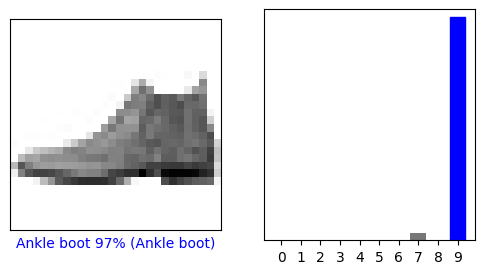

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

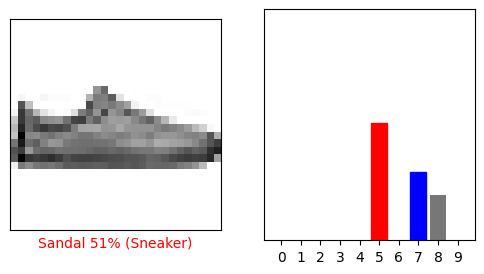

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

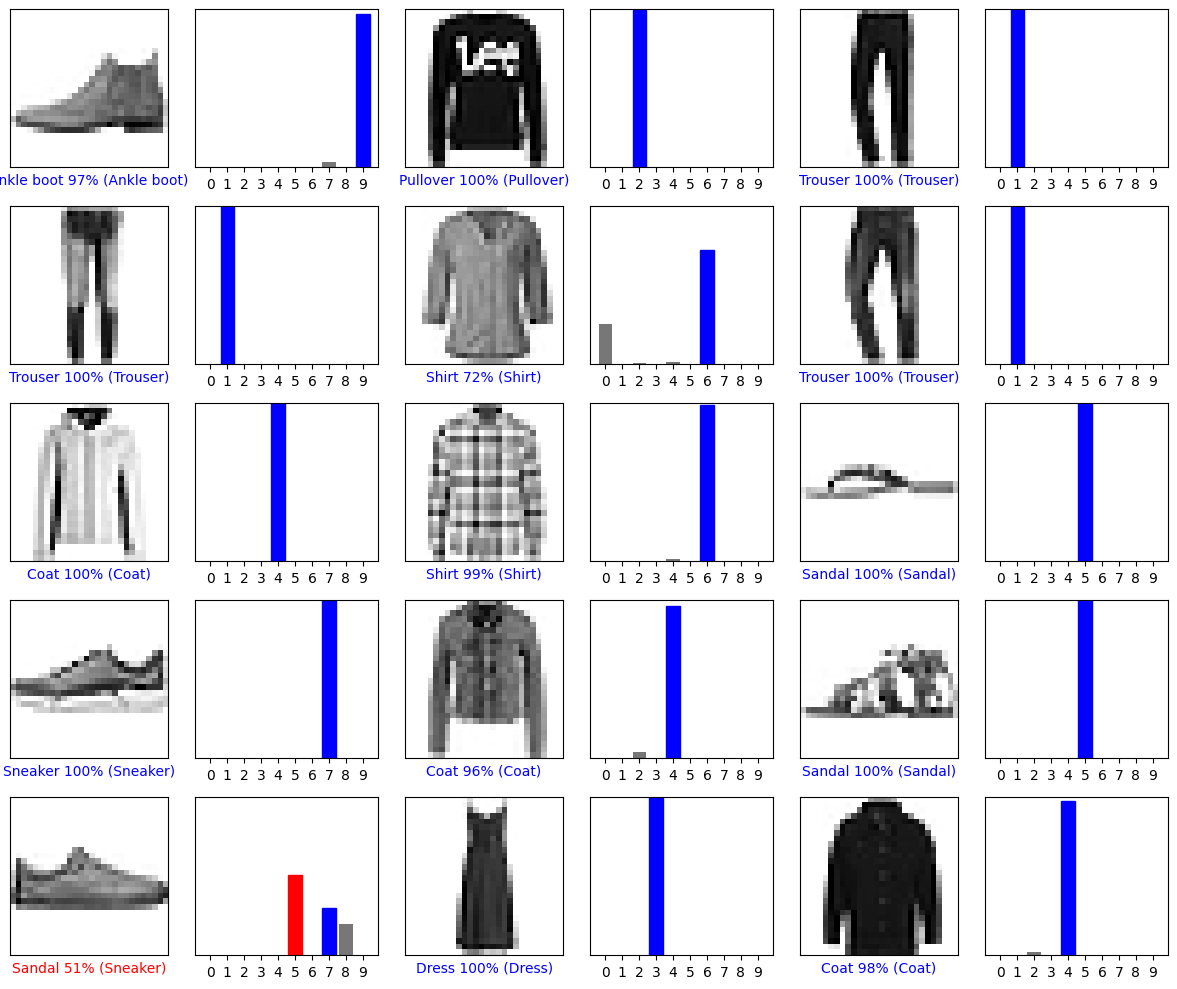

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


[[1.4027590e-05 1.1148100e-12 9.9622655e-01 2.5125588e-13 3.7112355e-03
  1.3180500e-15 4.8171700e-05 5.0670951e-16 1.0764679e-10 1.8591437e-17]]


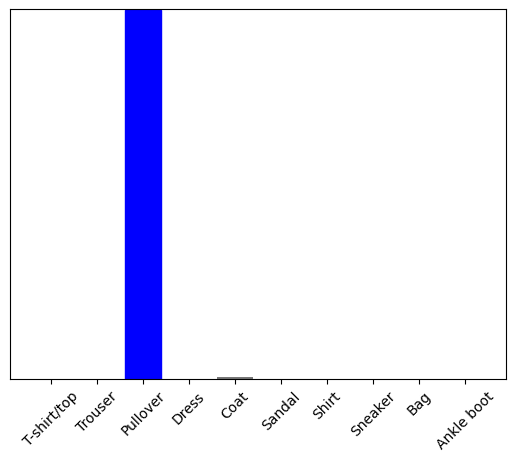

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.